# Genotation library usage example

General notebook imports as well as paths for local files

In [1]:
from pathlib import *

In [2]:
import sys

base = Path("..")
local = (base / "genotations").resolve()
if local.exists():
    sys.path.insert(0, Path("..").absolute().as_posix())
    sys.path.insert(0, local)
    print(sys.path)
else:
    base = Path(".")
%load_ext autoreload
%autoreload 2

[PosixPath('/home/antonkulaga/genotations/genotations'), '/home/antonkulaga/genotations/examples/..', '/home/antonkulaga/genotations/examples', '/home/antonkulaga/genotations', '/home/antonkulaga/micromamba/envs/genotations/lib/python310.zip', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/lib-dynload', '', '/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/site-packages']


In [3]:
import polars as pl
from genotations import genomes
from genotations.genomes import Annotations, SpeciesInfo
from genotations import *

/home/antonkulaga/micromamba/envs/genotations/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


For example if you want to explore mouse or human genome.
We already provided human and mouse genome for your

In [4]:
human = genomes.human
mouse = genomes.mouse
mouse

The way how it works: there an Annotation class the provides useful methods for genes and transcript selection, that can be chained

Show GTF as polars dataframe

In [5]:
mouse.annotations.annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""havana""","""gene""",150956201,150958296,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm37671""",null,null,null,null
"""1""","""havana""","""transcript""",150956201,150958296,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm37671""","""TEC""","""ENSMUST0000019...","""Gm37671-201""",null
"""1""","""havana""","""exon""",150956201,150958296,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm37671""","""TEC""","""ENSMUST0000019...","""Gm37671-201""",1
"""1""","""havana""","""gene""",150983666,150984611,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm19087""",null,null,null,null
"""1""","""havana""","""transcript""",150983666,150984611,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm19087""","""processed_pseu...","""ENSMUST0000019...","""Gm19087-201""",null
"""1""","""havana""","""exon""",150983666,150984611,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm19087""","""processed_pseu...","""ENSMUST0000019...","""Gm19087-201""",1
"""1""","""havana""","""gene""",151012258,151013531,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""",null,null,null,null
"""1""","""havana""","""transcript""",151012258,151013531,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""","""processed_pseu...","""ENSMUST0000018...","""Gm8941-201""",null
"""1""","""havana""","""exon""",151012258,151012971,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""","""processed_pseu...","""ENSMUST0000018...","""Gm8941-201""",1


if for some weird reasons you prefer pandas to polars, you can also get annotations as pandas dataframe

In [6]:
mouse.annotations.annotations_pandas

,seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
0,1,havana,gene,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,None,None,None,NaN
1,1,havana,transcript,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,TEC,ENSMUST00000193198,Gm37671-201,NaN
2,1,havana,exon,150956201,150958296,.,+,.,"gene_id ""ENSMUSG00000102628""; gene_version ""2""...",ENSMUSG00000102628,Gm37671,TEC,ENSMUST00000193198,Gm37671-201,1.0
3,1,havana,gene,150983666,150984611,.,+,.,"gene_id ""ENSMUSG00000100595""; gene_version ""2""...",ENSMUSG00000100595,Gm19087,None,None,None,NaN
4,1,havana,transcript,150983666,150984611,.,+,.,"gene_id ""ENSMUSG00000100595""; gene_version ""2""...",ENSMUSG00000100595,Gm19087,processed_pseudogene,ENSMUST00000191430,Gm19087-201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902091,JH584295.1,ensembl,CDS,708,752,.,-,2,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,5.0
1902092,JH584295.1,ensembl,exon,565,633,.,-,.,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,6.0
1902093,JH584295.1,ensembl,CDS,565,633,.,-,2,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,6.0
1902094,JH584295.1,ensembl,exon,66,109,.,-,.,"gene_id ""ENSMUSG00000095742""; gene_version ""2""...",ENSMUSG00000095742,None,protein_coding,ENSMUST00000179436,None,7.0


In [7]:
#Get exons of the genes
mouse.annotations.exons().annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""havana""","""exon""",150956201,150958296,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm37671""","""TEC""","""ENSMUST0000019...","""Gm37671-201""",1
"""1""","""havana""","""exon""",150983666,150984611,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm19087""","""processed_pseu...","""ENSMUST0000019...","""Gm19087-201""",1
"""1""","""havana""","""exon""",151012258,151012971,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""","""processed_pseu...","""ENSMUST0000018...","""Gm8941-201""",1
"""1""","""havana""","""exon""",151013347,151013531,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000009...","""Gm8941""","""processed_pseu...","""ENSMUST0000018...","""Gm8941-201""",2
"""1""","""havana""","""exon""",108344807,108347562,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm38212""","""TEC""","""ENSMUST0000019...","""Gm38212-201""",1
"""1""","""havana""","""exon""",6980784,6981446,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm7449""","""processed_pseu...","""ENSMUST0000019...","""Gm7449-201""",1
"""1""","""havana""","""exon""",75372851,75373007,""".""","""-""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000008...","""Gm15178""","""lncRNA""","""ENSMUST0000013...","""Gm15178-201""",1
"""1""","""havana""","""exon""",75368775,75369089,""".""","""-""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000008...","""Gm15178""","""lncRNA""","""ENSMUST0000013...","""Gm15178-201""",2
"""1""","""havana""","""exon""",108540067,108540244,""".""","""-""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000010...","""Gm28283""","""processed_pseu...","""ENSMUST0000018...","""Gm28283-201""",1


In [8]:
#only coding exons
mouse.annotations.protein_coding().exons().annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""ensembl_havana...","""exon""",7159144,7159440,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",1
"""1""","""ensembl_havana...","""exon""",7190418,7190839,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",2
"""1""","""ensembl_havana...","""exon""",7217861,7217963,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",3
"""1""","""ensembl_havana...","""exon""",7231116,7231287,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",4
"""1""","""ensembl_havana...","""exon""",7233472,7233595,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",5
"""1""","""ensembl_havana...","""exon""",7239739,7243852,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000006...","""Pcmtd1-201""",6
"""1""","""havana""","""exon""",7159154,7159440,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000018...","""Pcmtd1-202""",1
"""1""","""havana""","""exon""",7217861,7217963,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000018...","""Pcmtd1-202""",2
"""1""","""havana""","""exon""",7231116,7231287,""".""","""+""",""".""","""gene_id ""ENSMU...","""ENSMUSG0000005...","""Pcmtd1""","""protein_coding...","""ENSMUST0000018...","""Pcmtd1-202""",3


### Show gene and transcript names only
This is created as a separate dataframe as it is a very common task

In [9]:
mouse.annotations.transcript_gene_names_df

transcript,transcript_name,gene,gene_name
str,str,str,str
"""ENSMUST0000019...","""Gm37671-201""","""ENSMUSG0000010...","""Gm37671"""
"""ENSMUST0000019...","""Gm37671-201""","""ENSMUSG0000010...","""Gm37671"""
"""ENSMUST0000019...","""Gm19087-201""","""ENSMUSG0000010...","""Gm19087"""
"""ENSMUST0000019...","""Gm19087-201""","""ENSMUSG0000010...","""Gm19087"""
"""ENSMUST0000018...","""Gm8941-201""","""ENSMUSG0000009...","""Gm8941"""
"""ENSMUST0000018...","""Gm8941-201""","""ENSMUSG0000009...","""Gm8941"""
"""ENSMUST0000018...","""Gm8941-201""","""ENSMUSG0000009...","""Gm8941"""
"""ENSMUST0000019...","""Gm38212-201""","""ENSMUSG0000010...","""Gm38212"""
"""ENSMUST0000019...","""Gm38212-201""","""ENSMUSG0000010...","""Gm38212"""


### Getting sequence information

Get by Gene name

In [13]:
mouse_foxo_coding_transcripts = mouse.annotations.with_gene_name_contains("Foxo1").protein_coding().transcripts() #getting only coding Foxo1 transcripts
#mouse_foxo_coding_transcripts.with_sequences(mouse.genome)
mouse_foxo_coding_transcripts.with_sequences(mouse.genome, False).annotations_df

shape: (1, 16)
┌─────────┬───────────┬───────────┬──────────┬─────┬──────────┬────────────┬───────────┬───────────┐
│ seqname ┆ source    ┆ feature   ┆ start    ┆ ... ┆ transcri ┆ transcript ┆ exon_numb ┆ sequence  │
│ ---     ┆ ---       ┆ ---       ┆ ---      ┆     ┆ pt       ┆ _name      ┆ er        ┆ ---       │
│ str     ┆ str       ┆ str       ┆ u64      ┆     ┆ ---      ┆ ---        ┆ ---       ┆ object    │
│         ┆           ┆           ┆          ┆     ┆ str      ┆ str        ┆ u64       ┆           │
╞═════════╪═══════════╪═══════════╪══════════╪═════╪══════════╪════════════╪═══════════╪═══════════╡
│ 3       ┆ ensembl_h ┆ transcrip ┆ 52175757 ┆ ... ┆ ENSMUST0 ┆ Foxo1-201  ┆ null      ┆ caggggcgg │
│         ┆ avana     ┆ t         ┆          ┆     ┆ 00000537 ┆            ┆           ┆ ggcggcgcg │
│         ┆           ┆           ┆          ┆     ┆ 64       ┆            ┆           ┆ cgcgccgcc │
│         ┆           ┆           ┆          ┆     ┆          ┆            ┆           ┆ gcggg...  │
└─────────┴───────────┴───────────┴──────────┴─────┴──────────┴────────────┴───────────┴───────────┘

In [20]:
## Plot features

(<AxesSubplot: >,
 ({GF(Foxo1, 52175757-52260642 (1)): 0,
   GF(Foxo1-201_1, 52175757-52176843 ): 1.0,
   GF(Foxo1-201_2, 52252460-52253811 ): 1.0,
   GF(Foxo1-201_3, 52254417-52260642 ): 1.0},
  {GF(Foxo1-201_3, 52254417-52260642 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(Foxo1-201_2, 52252460-52253811 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(Foxo1-201_1, 52175757-52176843 ): {'feature_y': 1.0,
    'annotation_y': 2.0}}))

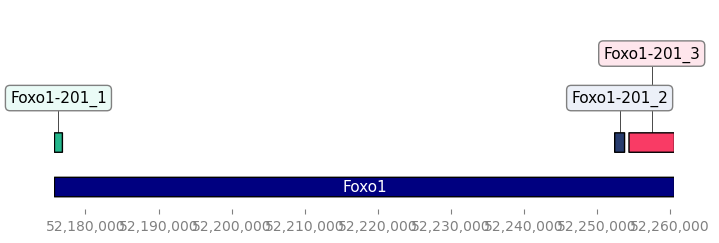

In [19]:
mouse.annotations.with_gene_name_contains("Foxo1").genes_visual(mouse.genome)[0].plot()

# Other genomes
If you want to get custom Ensembl assymbly, you can initialize it yourself.
We use genopy under the hood to do download and search
For example let's select on of cow genomes

In [23]:
cow_assemblies = genomes.search_assemblies("Bos taurus")
cow_assemblies

[('UOA_Angus_1',
  'GCA_003369685.2',
  30522,
  True,
  'Bos indicus x Bos taurus',
  '2018-12-Ensembl/2019-03'),
 ('UOA_Brahman_1',
  'GCA_003369695.2',
  30522,
  True,
  'Bos indicus x Bos taurus',
  '2018-12-Ensembl/2019-03'),
 ('ARS-UCD1.2',
  'GCA_002263795.2',
  9913,
  True,
  'Bos taurus',
  '2018-09-Ensembl/2018-11')]

In [51]:
cow1 = genomes.SpeciesInfo("Cow", cow_assemblies[-1][0])
cow1.annotations.annotations_df

seqname,source,feature,start,end,score,strand,frame,attribute,gene,gene_name,transcript_biotype,transcript,transcript_name,exon_number
str,str,str,u64,u64,str,cat,str,str,str,str,str,str,str,u64
"""1""","""ensembl""","""gene""",339070,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,null,null,null,null
"""1""","""ensembl""","""transcript""",339070,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,null
"""1""","""ensembl""","""exon""",350267,350389,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,1
"""1""","""ensembl""","""CDS""",350267,350389,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,1
"""1""","""ensembl""","""start_codon""",350387,350389,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,1
"""1""","""ensembl""","""exon""",346602,346924,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,2
"""1""","""ensembl""","""CDS""",346602,346924,""".""","""-""","""0""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,2
"""1""","""ensembl""","""exon""",342547,342721,""".""","""-""",""".""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,3
"""1""","""ensembl""","""CDS""",342547,342721,""".""","""-""","""1""","""gene_id ""ENSBT...","""ENSBTAG0000000...",null,"""protein_coding...","""ENSBTAT0000000...",null,3


(<AxesSubplot: >,
 ({GF(FOXO1, 21900230-21991693 (1)): 0,
   GF(FOXO1-201_1, 21900230-21900960 ): 1.0,
   GF(FOXO1-201_2, 21901144-21901361 ): 1.0,
   GF(FOXO1-201_3, 21988870-21990226 ): 1.0,
   GF(FOXO1-201_4, 21990694-21991693 ): 1.0},
  {GF(FOXO1-201_3, 21988870-21990226 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_4, 21990694-21991693 ): {'feature_y': 1.0,
    'annotation_y': 3.0},
   GF(FOXO1-201_1, 21900230-21900960 ): {'feature_y': 1.0,
    'annotation_y': 2.0},
   GF(FOXO1-201_2, 21901144-21901361 ): {'feature_y': 1.0,
    'annotation_y': 3.0}}))

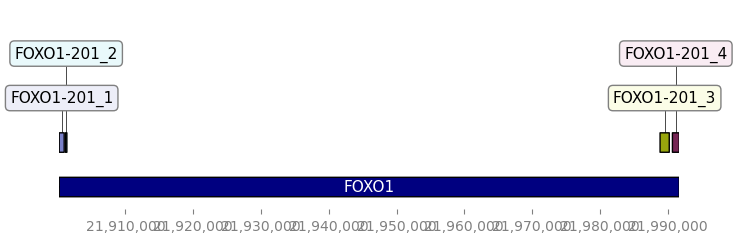

In [60]:
cow1.annotations.with_gene_name_contains("FOXO1").genes_visual(cow1.genome)[0].plot()